<a href="https://colab.research.google.com/github/karthik7901/reliable-foodcourt/blob/main/Accent_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Dowloading dataset from kaggle

In [ ]:
# ! pip install -q kaggle
# from google.colab import files
# files.upload()
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list
# ! kaggle datasets download -d rtatman/speech-accent-archive

Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
akshaydattatraykhare/diabetes-dataset                           Diabetes Dataset                                      9KB  2022-10-06 08:55:25           5090        170  1.0              
vittoriogiatti/bigmacprice                                      Bigmac Prices                                        14KB  2022-10-19 21:11:14           1106         32  1.0              
whenamancodes/covid-19-coronavirus-pandemic-dataset             COVID -19 Coronavirus Pandemic Dataset               11KB  2022-09-30 04:05:11           4

In [ ]:
# # Making New Folder Speech Accent Detection
# ! mkdir '/content/drive/MyDrive/Speech Accent Detection'

mkdir: cannot create directory ‘/content/drive/MyDrive/Speech Accent Detection’: File exists


In [ ]:
# Unzipping the file
# ! unzip speech-accent-archive.zip -d '/content/drive/MyDrive/Speech Accent Detection'

Archive:  speech-accent-archive.zip
  inflating: /content/drive/MyDrive/Speech Accent Detection/reading-passage.txt  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/afrikaans1.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/afrikaans2.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/afrikaans3.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/afrikaans4.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/afrikaans5.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/agni1.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/akan1.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/albanian1.mp3  
  inflating: /content/drive/MyDrive/Speech Accent Detection/recordings/recordings/albanian2.mp3  
  i

#### Importing Libraries

In [ ]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import warnings
warnings.filterwarnings('ignore')
from tqdm import *

OUTPUT_DIR='/content/drive/MyDrive/model'
os.chdir("/content/drive/MyDrive/Speech Accent Detection/recordings")

In [ ]:
fname_f = 'recordings/english385.mp3'   
ipd.Audio(fname_f)

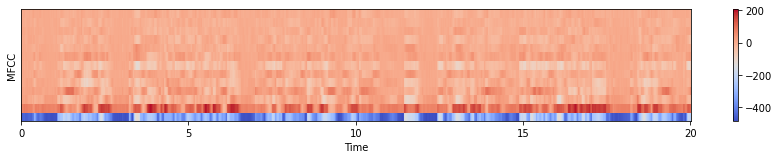

In [ ]:
SAMPLE_RATE = 22050
fname_f = 'recordings/english385.mp3'

y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 20)# Chop audio at 10 secs...
mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 13)# 10 MFCC components

plt.figure(figsize=(15, 7))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc,x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Speech Accent Detection/speakers_all.csv')
data.head()


,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,24.0,12.0,"koussi, senegal",balanta,balanta,male,788,senegal,True,NaN,NaN,NaN
1,18.0,10.0,"buea, cameroon",cameroon,cameroon,male,1953,cameroon,True,NaN,NaN,NaN
2,48.0,8.0,"hong, adamawa, nigeria",fulfulde,fulfulde,male,1037,nigeria,True,NaN,NaN,NaN
3,42.0,42.0,"port-au-prince, haiti",haitian,haitian,male,1165,haiti,True,NaN,NaN,NaN
4,40.0,35.0,"port-au-prince, haiti",haitian,haitian,male,1166,haiti,True,NaN,NaN,NaN


In [ ]:
data.tail()

(122, 2)

In [ ]:
data[data['native_language']=='english']

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,Unnamed: 9,Unnamed: 10,Unnamed: 11
363,42.0,0.0,"pittsburgh, pennsylvania, usa",english1,english,male,61,usa,False,NaN,NaN,NaN
364,35.0,0.0,"davenport, iowa, usa",english10,english,female,62,usa,False,NaN,NaN,NaN
365,23.0,0.0,"miami, florida, usa",english100,english,female,63,usa,False,NaN,NaN,NaN
366,18.0,0.0,"toronto, ontario, canada",english101,english,female,64,canada,False,NaN,NaN,NaN
367,22.0,0.0,"torrington, connecticut, usa",english102,english,male,65,usa,False,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
937,18.0,0.0,"mishawaka, indiana, usa",english95,english,male,160,usa,False,NaN,NaN,NaN
938,31.0,0.0,"point pleasant, new jersey, usa",english96,english,male,161,usa,False,NaN,NaN,NaN
939,42.0,0.0,"wilmington nc, north carolina, usa",english97,english,male,162,usa,False,NaN,NaN,NaN
940,22.0,0.0,"spokane, washington, usa",english98,english,male,163,usa,False,NaN,NaN,NaN


In [ ]:
data[data['file_missing?']=='True'].count()

age                0
age_onset          0
birthplace         0
filename           0
native_language    0
sex                0
speakerid          0
country            0
file_missing?      0
Unnamed: 9         0
Unnamed: 10        0
Unnamed: 11        0
dtype: int64

In [ ]:
data['sex'].value_counts()

male      1123
female    1048
famale       1
Name: sex, dtype: int64

In [ ]:
res=data['native_language'].value_counts()






In [ ]:
res1 =data[data['native_language']!='english'].native_language.value_counts()

In [ ]:
res1[res>40].sum()

587

In [ ]:
dg=data.groupby("native_language").filter(lambda x: len(x) >40)

In [ ]:
test_data = data.groupby("native_language").filter(lambda x: len(x) <40)

In [ ]:
dg.sex.value_counts()

male      612
female    554
Name: sex, dtype: int64

In [ ]:
dg['native_language'].value_counts()

english       579
spanish       162
arabic        102
mandarin       65
french         63
korean         52
portuguese     48
russian        48
dutch          47
Name: native_language, dtype: int64

In [ ]:
data.shape

(2172, 12)

In [ ]:
dg.shape

(1166, 12)

In [ ]:

dg['filename'] = dg['filename'].apply(lambda x: x+'.mp3')

In [ ]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,accent
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False,non-native
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False,non-native
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False,non-native
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False,non-native
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False,non-native


In [ ]:
dg.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11'],inplace=True)

KeyError: ignored

In [ ]:
dg.head()

,age,age_onset,birthplace,filename,native_language,sex,speakerid,country,file_missing?,accent
70,38.0,12.0,"riyadh, saudi arabia",arabic1.mp3,arabic,female,11,saudi arabia,False,non-native
71,26.0,5.0,"cairo, egypt",arabic10.mp3,arabic,male,12,egypt,False,non-native
72,40.0,10.0,"beirut, lebanon",arabic100.mp3,arabic,female,2159,lebanon,False,non-native
73,21.0,10.0,"doha, qatar",arabic101.mp3,arabic,male,2160,qatar,False,non-native
74,22.0,3.0,"jiddah, saudi arabia",arabic102.mp3,arabic,male,2161,saudi arabia,False,non-native


In [ ]:
dg['accent'] = dg['native_language'].apply(lambda x: 'native' if x=='english' else 'non-native')

In [ ]:
dg['accent'].value_counts()

non-native    587
native        579
Name: accent, dtype: int64

In [ ]:
def feature_extractor(files, feature_type='mfcc'):
    features = []
    SAMPLE_RATE = 22050
    dire = 'recordings/'
    if feature_type == 'mfcc':
        for file in files:
            f_name = str(dire+file)
            y, sr = librosa.load(f_name, sr=SAMPLE_RATE, duration = 10)
            mfcc = librosa.feature.mfcc(y=y, sr=SAMPLE_RATE, n_mfcc = 10)
            features.append(mfcc)
    return features

In [ ]:
class Config(object):
    def __init__(self,sampling_rate=16000, audio_duration=2, n_classes=10, learning_rate=0.0001, max_epochs=20, n_mfcc=40):
        self.sampling_rate = sampling_rate
        self.audio_duration = audio_duration
        self.n_classes = n_classes
        self.n_mfcc = n_mfcc
        self.learning_rate = learning_rate
        self.max_epochs = max_epochs
        self.audio_length = self.sampling_rate * self.audio_duration
        self.dim = (self.n_mfcc, 1 + int(np.floor(self.audio_length/512)), 1)
def prepare_data(fnames, config, data_dir):
    X = np.empty(shape=(len(fnames), config.dim[0], config.dim[1], 1))
    input_length = config.audio_length
    for i, fname in tqdm_notebook(enumerate(fnames), total=len(fnames)):
        file_path = os.path.join(data_dir, fname)
        data, _ = librosa.core.load(file_path, sr=config.sampling_rate, res_type="kaiser_fast")

        # Random offset / Padding
        if len(data) > input_length:
            max_offset = len(data) - input_length
            offset = np.random.randint(max_offset)
            data = data[offset:(input_length+offset)]
        else:
            if input_length > len(data):
                max_offset = input_length - len(data)
                offset = np.random.randint(max_offset)
            else:
                offset = 0
            data = np.pad(data, (offset, input_length - len(data) - offset), "constant")

        data = librosa.feature.mfcc(data, sr=config.sampling_rate, n_mfcc=config.n_mfcc)
        data = np.expand_dims(data, axis=-1)
        X[i,] = data
    return X

In [ ]:
X_fnames = np.array(dg['filename'])
data_path = '/content/drive/MyDrive/Speech Accent Detection/recordings/recordings'

config = Config(sampling_rate=22050, audio_duration=20, learning_rate=0.0001, n_mfcc=13, n_classes=2)
feature_file_path = OUTPUT_DIR+'mfcc_features.npy'
feature_file_path = '/content/drive/MyDrive/Speech Accent Detection/mfcc_features.npy'
if os.path.exists(feature_file_path):
    X = np.load(feature_file_path)
else:
    X = prepare_data(X_fnames, config, data_path)
    np.save(feature_file_path, X)

  0%|          | 0/1166 [00:00<?, ?it/s]

In [ ]:
with open(OUTPUT_DIR+'mfcc_features.npy', 'wb+') as f:
    np.save(f, X)

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

y_gender = dg['sex']
y_accent = dg['accent']

encoder = LabelEncoder()
encoder.fit(y_gender)
y_gender = encoder.transform(y_gender)

encoder1 = LabelEncoder()
encoder1.fit(y_accent)
y_accent = encoder1.transform(y_accent)
y_gender = to_categorical(np.array(y_gender))
y_accent = to_categorical(np.array(y_accent))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_gender_train, y_gender_test, y_accent_train, y_accent_test = train_test_split(X, y_gender, y_accent, test_size=0.2, random_state=10)
print ('Train set:', X_train.shape,  y_gender_train.shape)
print ('Test set:', X_test.shape,  y_gender_test.shape)

X_train, X_val, y_gender_train, y_gender_val, y_accent_train, y_accent_val = train_test_split(X_train, y_gender_train, y_accent_train, test_size=0.15, random_state=10)

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_val = (X_val - mean)/std
X_test = (X_test - mean)/std

Train set: (932, 13, 862, 1) (932, 2)
Test set: (234, 13, 862, 1) (234, 2)


In [ ]:
print ('Label accent set:', y_accent_train.shape,  y_accent_test.shape)

Label accent set: (792, 2) (234, 2)


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Input, Conv2D, BatchNormalization, MaxPooling2D, LSTM, Concatenate
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf
from keras.regularizers import l2

In [ ]:
def create_cnn_model(input_shape=None):
    # Create CNN model
    input_layer = Input(shape=(13, 862, 1), name='Input')
    # conv 1
    conv = Conv2D(32, 3, padding='same', activation='relu')(input_layer)
    batchnorm = BatchNormalization()(conv)
    maxpool = MaxPooling2D(pool_size=(2, 2))(batchnorm)
    batchnorm1 = BatchNormalization()(maxpool)
    # conv 2
    conv1 = Conv2D(32, 3, padding='same', activation='relu')(batchnorm1)
    batchnorm2 = BatchNormalization()(conv1)
    maxpool1 = MaxPooling2D(pool_size=(2, 2))(batchnorm2)
    batchnorm3 = BatchNormalization()(maxpool1)
    # conv 3
    conv2 = Conv2D(128, 3, padding='same', activation='relu', name='conv2')(batchnorm3)
    batchnorm4 = BatchNormalization()(conv2)
    maxpool2 = MaxPooling2D(pool_size=(2, 2))(batchnorm4)
    batchnorm5 = BatchNormalization()(maxpool2)
    # flatten
    flatten = Flatten()(batchnorm5)
    dense = Dense(64, activation='relu',name='Hidden_1')(flatten)
    dropout = Dropout(0.5)(dense)
    # output
    out = Dense(2, activation='softmax',name='output')(dropout)
    model = Model(inputs = input_layer ,outputs=out)
    return model


In [ ]:
model_cnn_accent = create_cnn_model()

In [ ]:
model_cnn_accent.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 13, 862, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 13, 862, 32)       320       
                                                                 
 batch_normalization (BatchN  (None, 13, 862, 32)      128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 6, 431, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 6, 431, 32)       128       
 hNormalization)                                                 
                                                             

In [ ]:
model_cnn_accent.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from datetime import datetime 

num_epochs = 20
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath=OUTPUT_DIR +'saved_models/accent_classification_cnn.h5', 
                               verbose=1, save_best_only=True,patience=10, mode='max', monitor='val_accuracy')
early_stopping = EarlyStopping(monitor="val_loss", mode="min", patience=5)

start = datetime.now()

history = model_cnn_accent.fit(X_train, y_accent_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_accent_val), callbacks=[checkpointer,early_stopping], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 1.0000
Epoch 1: val_accuracy improved from -inf to 0.55000, saving model to /content/drive/MyDrive/modelsaved_models/accent_classification_cnn.h5
25/25 [==============================] - 18s 721ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 2.1559 - val_accuracy: 0.5500
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 0.0107 - accuracy: 1.0000
Epoch 2: val_accuracy improved from 0.55000 to 0.57857, saving model to /content/drive/MyDrive/modelsaved_models/accent_classification_cnn.h5
25/25 [==============================] - 18s 736ms/step - loss: 0.0107 - accuracy: 1.0000 - val_loss: 2.1544 - val_accuracy: 0.5786
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 0.0052 - accuracy: 1.0000
Epoch 3: val_accuracy did not improve from 0.57857
25/25 [==============================] - 18s 717ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 2.0314 - val_accurac

In [ ]:
results_accent = model_cnn_accent.evaluate(X_test, y_accent_test)
print(results_accent)

8/8 [==============================] - 1s 142ms/step - loss: 1.5911 - accuracy: 0.6709
[1.591121792793274, 0.6709401607513428]


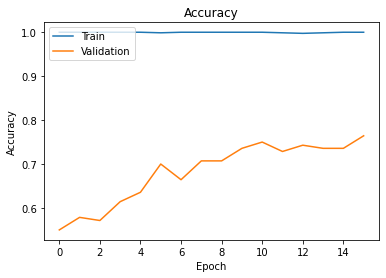

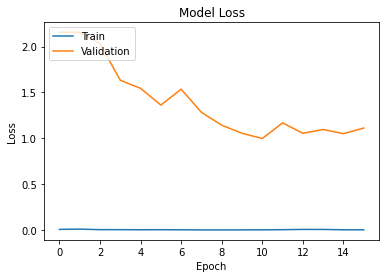

In [ ]:
# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()

# Plot training and validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc = 'upper left')
plt.show()